## Preprocess global sea surface temperatures to get global mean Temperature 

In [12]:
import s3fs
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from lo_tools import Lfun
from lo_tools import plotting_functions as pfun

In [13]:
Ldir = Lfun.Lstart()
# output location
out_dir = Ldir['LOo'] / 'plots'/ 'stressor'/ 'MHW' / 'OISST'
Lfun.make_dir(out_dir, clean=False)
outname = 'plot_global_monthly_mean_OISST.png'
outfile = out_dir / outname


### Import NOAA OISST v2.1 dataset and resample to monthly means

In [14]:
endpoint_url = 'https://ncsa.osn.xsede.org'
fs_osn = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': endpoint_url},)

path = "Pangeo/pangeo-forge/noaa_oisst/v2.1-avhrr.zarr"
ds = xr.open_zarr(fs_osn.get_mapper(path), consolidated=True, decode_timedelta=True).resample(time='MS').mean()
print(ds)

<xarray.Dataset> Size: 8GB
Dimensions:  (time: 478, zlev: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * zlev     (zlev) float32 4B 0.0
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2021-06-01
Data variables:
    anom     (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    err      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    ice      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
    sst      (time, zlev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 720, 1440), meta=np.ndarray>
Attributes: (12/37)
    Conventions:                CF-1.6, ACDD-1.3
    cdm_data_type:              Grid
    comment:                    Data was converted from NetCDF-3 to NetCDF-4 ...
    creator_e

### Compute anomalies without the trend

In [15]:
# Decimal Year
dyr = ds.time.dt.year + ds.time.dt.month/12

In [16]:
sst = ds.sst.isel(zlev=0).drop('zlev')
# sst.load()

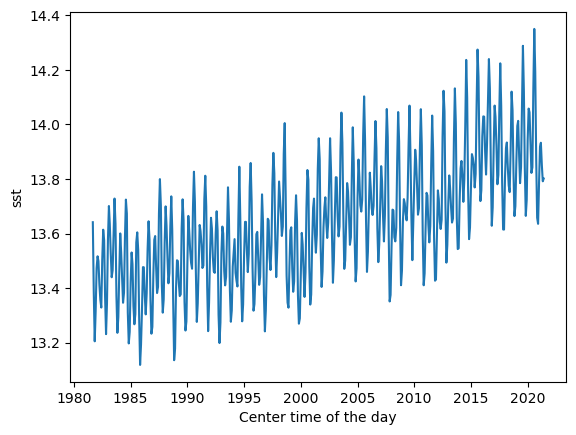

In [17]:
# plot Global mean SST
# sst.mean(('lat','lon')).plot()

In [18]:
# sst

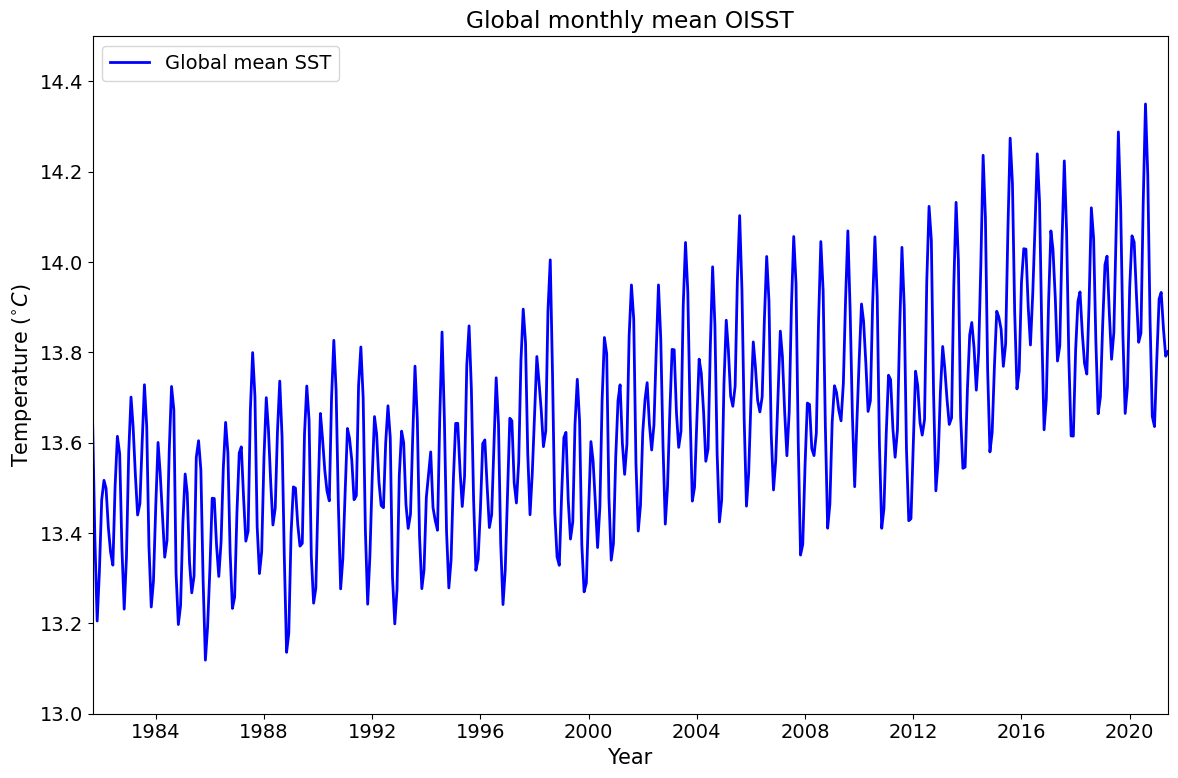

In [21]:
pfun.start_plot(figsize=(12,8))
fig = plt.figure()
ax = fig.add_subplot()
# sst.mean(('lat','lon')).plot()
ax.plot(sst.time.values, sst.mean(('lat','lon')), color = 'blue',linewidth=2, label = 'Global mean SST')
ax.set_xlim(pd.Timestamp(sst.time[0].values), pd.Timestamp(sst.time[-1].values))
ax.set_ylim([13,14.5])
ax.set_ylabel('Temperature $(^{\circ}C)$',fontsize = 15)
ax.set_xlabel('Year',fontsize = 15)
ax.set_title('Global monthly mean OISST')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(outfile)
plt.show()
pfun.end_plot()